In [1]:
import numpy as np

from pathlib import Path
from matplotlib import pyplot as plt

from flowrec.utils.simulation import read_data_kolsol
from flowrec.data import get_whitenoise_std

In [2]:
data = read_data_kolsol('./local_data/kolmogorov/dim2_re34_k32_f4_dt01_grid128.h5')[:,...,:]

In [3]:
point = (43,12)
u = data[:,point[0],point[1],0]
v = data[:,point[0],point[1],1]
p = data[:,point[0],point[1],2]

In [4]:
rng = np.random.default_rng(23910)
un = u + rng.normal(loc=0.0,scale=get_whitenoise_std(20,np.std(u)),size=(12000))
vn = v + rng.normal(loc=0.0,scale=get_whitenoise_std(20,np.std(v)),size=(12000))
pn = p + rng.normal(loc=0.0,scale=get_whitenoise_std(20,np.std(p)),size=(12000))

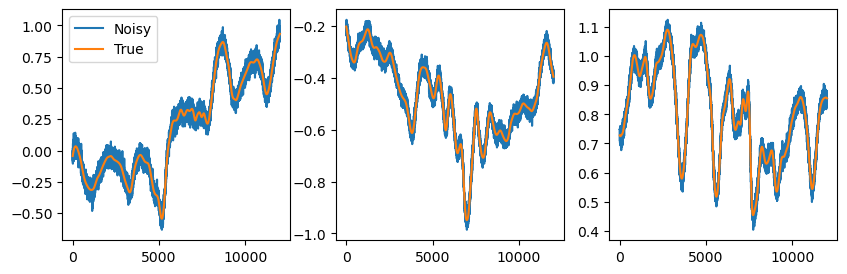

In [12]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

axes[0].plot(un,label='Noisy')
axes[0].plot(u,label='True')
axes[0].legend()
axes[1].plot(vn)
axes[1].plot(v)
axes[2].plot(pn)
axes[2].plot(p)
plt.show()

Integral time scale

In [33]:
def autocorrelation(x):
    a = x - np.mean(x)
    autocorr = np.correlate(a,a,'full')[-len(a):]
    autocorr = autocorr / np.sum(a**2)
    return autocorr

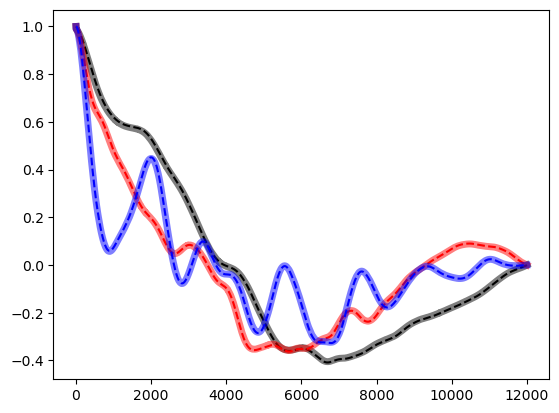

In [38]:
un_corr = autocorrelation(un)
u_corr = autocorrelation(u)
vn_corr = autocorrelation(vn)
v_corr = autocorrelation(v)
pn_corr = autocorrelation(pn)
p_corr = autocorrelation(p)

plt.figure()
plt.plot(un_corr,c='k',linewidth='5',alpha=0.5)
plt.plot(u_corr,c='k',linestyle='--')
plt.plot(vn_corr,c='r',linewidth='5',alpha=0.5)
plt.plot(v_corr,c='r',linestyle='--')
plt.plot(pn_corr,c='b',linewidth='5',alpha=0.5)
plt.plot(p_corr,c='b',linestyle='--')

In [45]:
dt = 0.01
t = np.linspace(0,len(u)-1,len(u))*0.01

In [64]:
t1 = np.trapz(u_corr[:6400],dx=dt)
print(t1)
print(t1/dt)
print(10*t1/dt)

13.000300709269453
1300.0300709269452
13000.300709269453


In [74]:
idxx = np.random.randint(0,128,50)
idxy = np.random.randint(0,128,50)

In [75]:
tscale_list = []
for ii in range(3):
    for ix,iy in zip(idxx,idxy):
        c = autocorrelation(data[:,ix,iy,ii])
        tscale_list.append(
            np.trapz(c,dx=dt)
        )
        # if i % 128 == 0:
        #     print(f'row {int(i/128)}')
tscale = np.mean(tscale_list)

In [76]:
print(tscale,tscale/dt)

2.5682231928105447e-07 2.5682231928105446e-05


# 1: compute the fourier transform of the observations
window length must be one order of magnitude larger than the integral time scale
